In [207]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [208]:
df=pd.read_excel(r"C:\Users\khali\DATA SCIENCE FILES\Bank_Personal_Loan_Modelling.xlsx",1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [209]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [210]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [211]:
import plotly.express as px

In [212]:
fig=px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

In [213]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [214]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

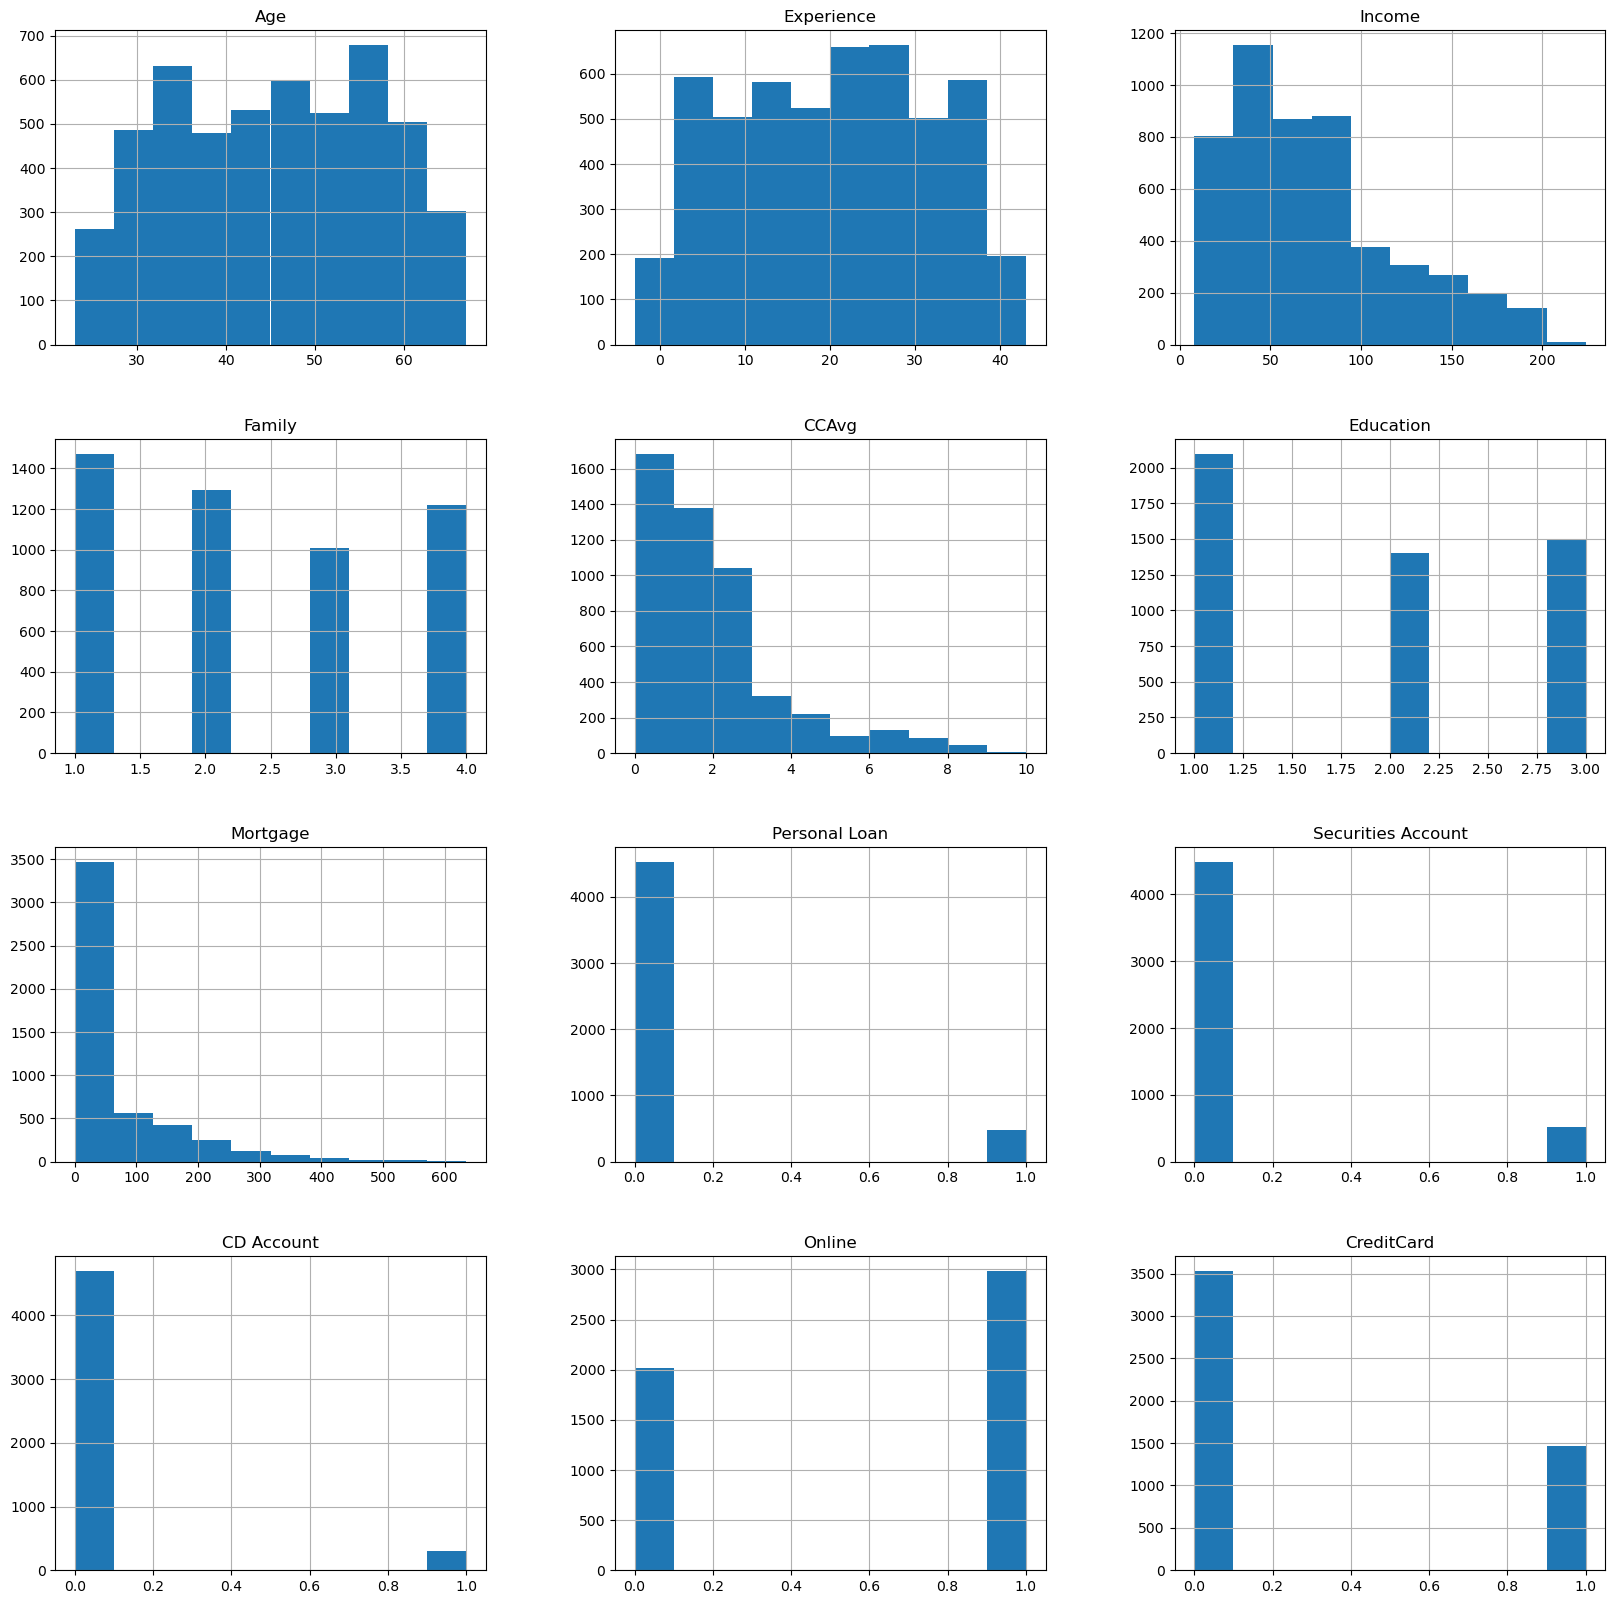

In [215]:
df.hist(figsize=(20,20))

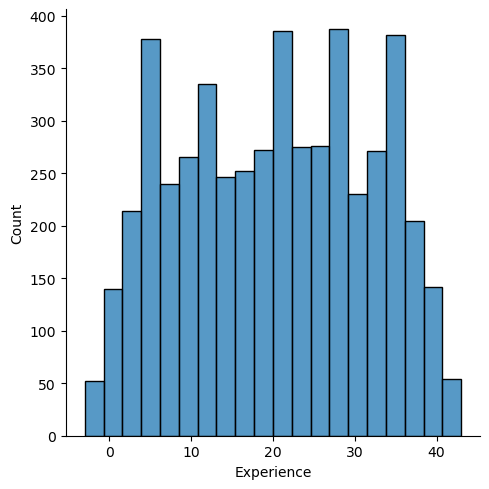

In [216]:
sns.displot(df['Experience'])

In [217]:
df['Experience'].mean()

20.1046

In [218]:
negative_exp=df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


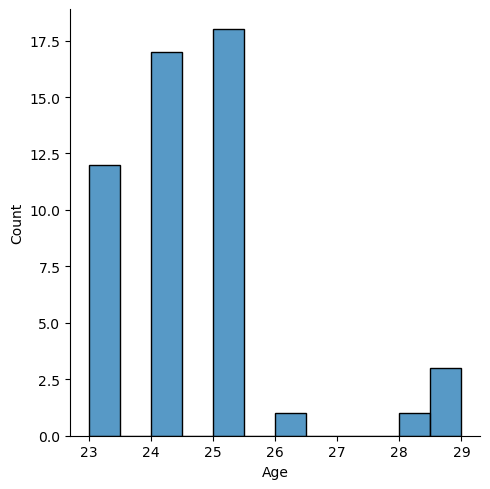

In [219]:
sns.displot(negative_exp['Age'])

In [220]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [221]:
negative_exp.size

624

In [222]:
print('There are {} records which has negative value for experience, approx {}% '.format(negative_exp.size, (negative_exp.size/df.size)*100))

There are 624 records which has negative value for experience, approx 1.04% 


In [223]:
data=df.copy()

In [224]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [225]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [226]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [227]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

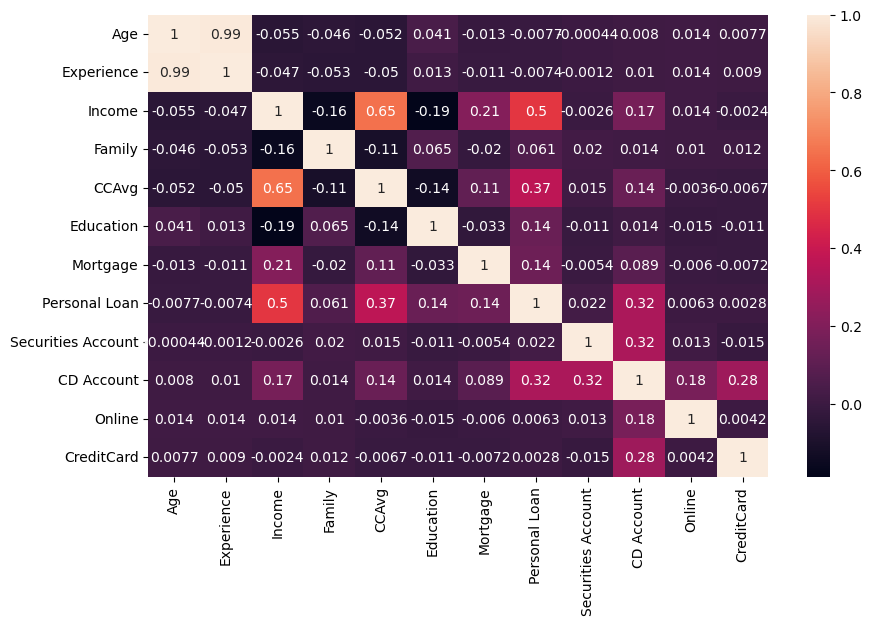

In [228]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [229]:
data=data.drop(['Experience'],axis=1)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [230]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [231]:
def mark(x):
    if x==1:
        return 'Undergrad'
    elif x==2:
        return 'Graduate'
    elif x==3:
        return 'Advanced/Professional'

In [232]:
data['Edu_mark']=data['Education'].apply(mark)

In [233]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [234]:
edu_dis=data.groupby('Edu_mark')['Age'].count()

In [235]:
edu_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergrad                2096
Name: Age, dtype: int64

In [236]:
fig=px.pie(data,values=edu_dis, names=edu_dis.index,title='Pie Chart')
fig.show()

In [237]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [239]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

In [240]:
def security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'holds securities and deposits'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not holds securities or deposits'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return 'holds securities not deposits'
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return 'holds only deposits'

In [242]:
data['Account_holder_category']=data.apply(security_CD,axis=1)

In [245]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,holds securities not deposits
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,holds securities not deposits
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not holds securities or deposits
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not holds securities or deposits
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not holds securities or deposits


In [249]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not holds securities or deposits',
       'holds securities not deposits', 'holds only deposits',
       'holds securities and deposits'],
      dtype='object')

In [344]:
fig=px.pie(data,values=values, names=values.index,title='Pie Chart')
fig.show()

In [251]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,holds securities not deposits
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,holds securities not deposits
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not holds securities or deposits
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not holds securities or deposits
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not holds securities or deposits


In [255]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [258]:
def loan(x):
    if x==0:
        return 'No loan'
    elif x==1:
        return 'loan'

In [260]:
data['customer took loan']=data['Personal Loan'].apply(loan)

In [263]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category,customer took loan
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,holds securities not deposits,No loan
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,holds securities not deposits,No loan
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not holds securities or deposits,No loan
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not holds securities or deposits,No loan
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not holds securities or deposits,No loan


In [336]:
px.box(data,x='Education',y='Income', facet_col='Personal Loan')

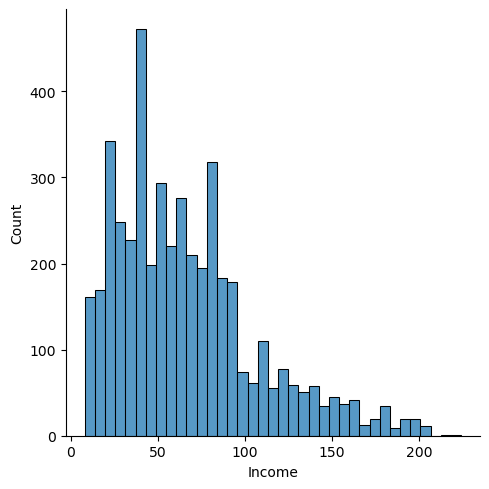

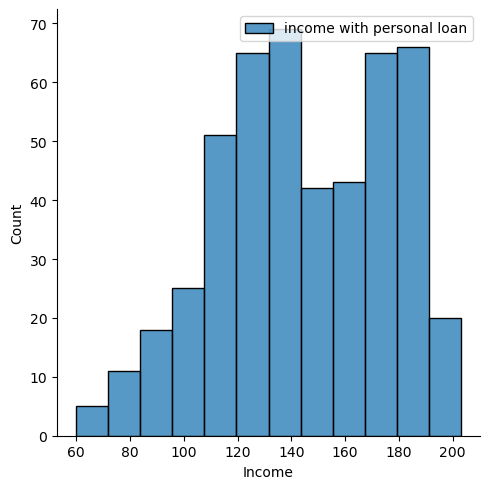

In [345]:
sns.displot(data[data['Personal Loan']==0]['Income'],label='income with no personal loan') 
sns.displot(data[data['Personal Loan']==1]['Income'],label='income with personal loan')
plt.legend()

In [348]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.displot(data[data[col2]==0][col1],label=label1) 
    sns.displot(data[data[col2]==1][col1],label=label2)
    plt.legend()
    plt.title(title)

<Figure size 1200x800 with 0 Axes>

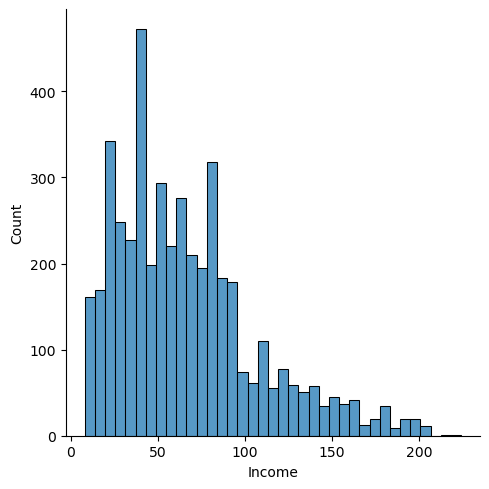

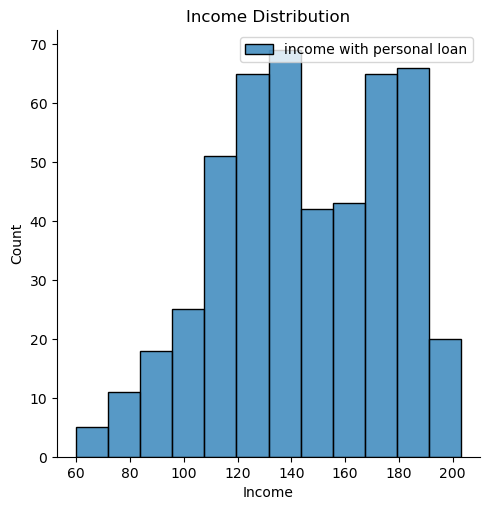

In [350]:
plot('Income','Personal Loan','income with no personal loan','income with personal loan','Income Distribution')

<Figure size 1200x800 with 0 Axes>

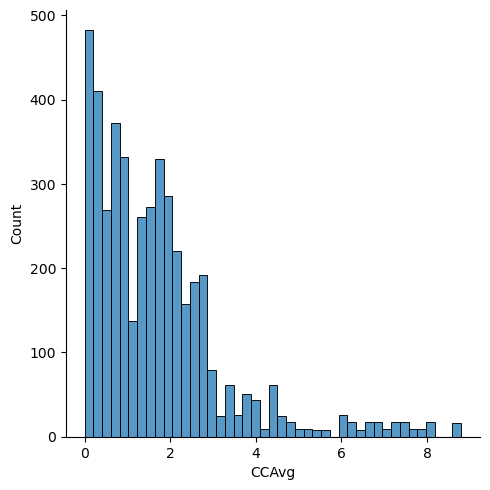

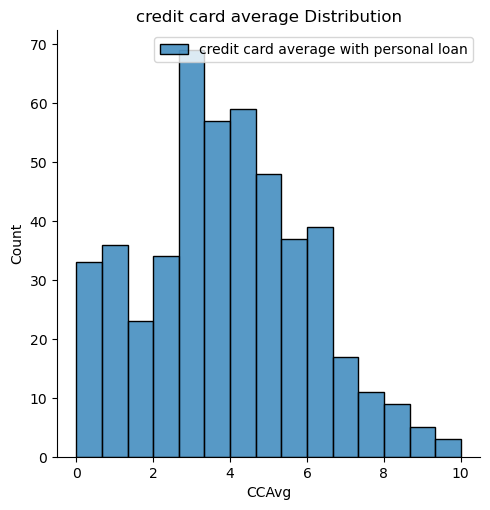

In [352]:
plot('CCAvg','Personal Loan','credit card average with no personal loan','credit card average with personal loan','credit card average Distribution')

In [354]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category',
       'customer took loan'],
      dtype='object')

In [355]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

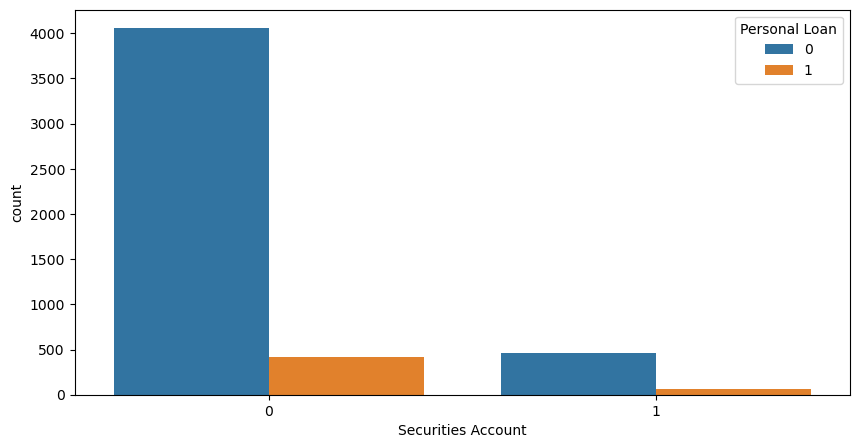

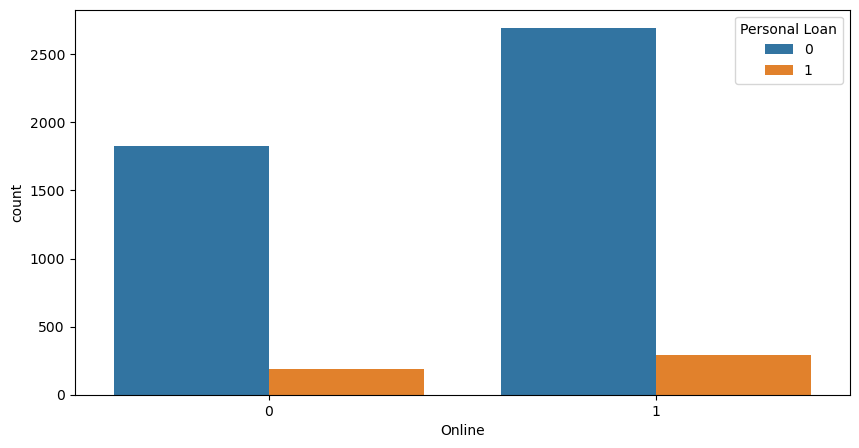

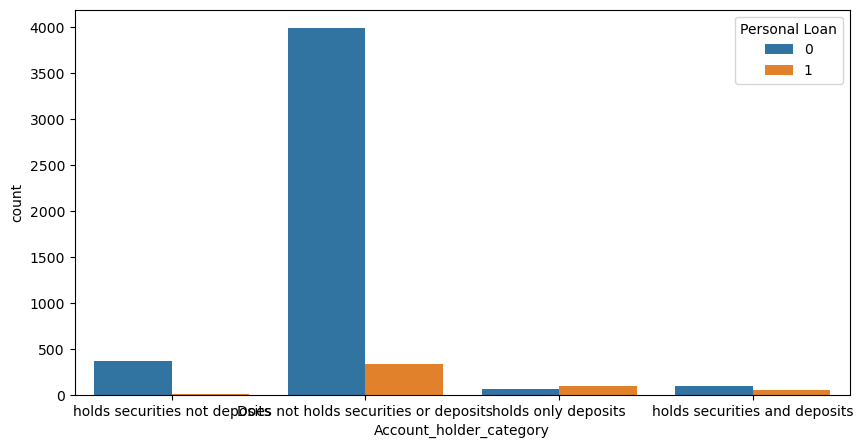

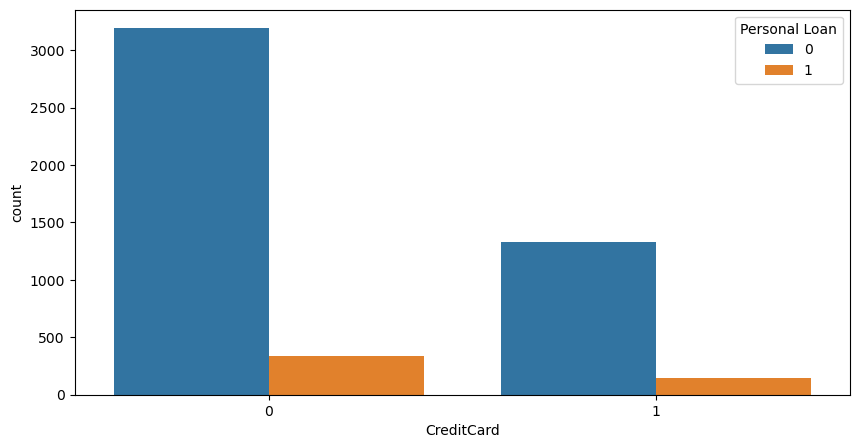

In [357]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)

C:\Users\khali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

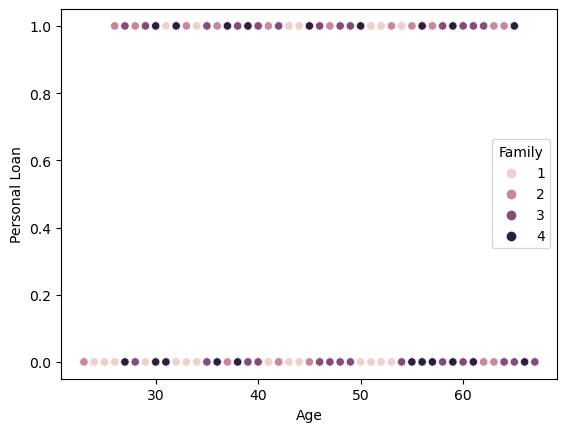

In [358]:
sns.scatterplot(data['Age'],data['Personal Loan'],hue=data['Family'])

In [359]:
 import scipy.stats as stats

In [360]:
H0 = 'Age does not have impact on availing personal loan'
Ha = 'Age does have an impact on availing personal loan'

In [363]:
age_no = np.array(data[data['Personal Loan']==0]['Age'])
age_yes = np.array(data[data['Personal Loan']==1]['Age'])

In [365]:
t,p_values = stats.ttest_ind(age_no,age_yes,axis=0)
if p_values<0:
    print(Ha,'as the p_value is less that 0.05 with a value of {}'.format(p_values))
else:
    print(H0,'as the p_values is greater than 0.05 with the value of {}'.format(p_values))

Age does not have impact on availing personal loan as the p_values is greater than 0.05 with the value of 0.584959263705325


In [377]:
def hypothesis(col1,col2,H0,Ha):
    array1 = np.array(data[data[col1]==0][col2])
    array2 = np.array(data[data[col1]==1][col2])
    t,p_values = stats.ttest_ind(array1,array2,axis=0)
    if p_values<0.05:
        print('{} as the p_value is less that 0.05 with a value of {}'.format(Ha,p_values))
    else:
        print('{} as the p_values is greater than 0.05 with the value of {}'.format(H0,p_values))
    

In [378]:
hypothesis('Personal Loan','Age',H0=('Age does not have impact on availing personal loan'),Ha=('Age does have an impact on availing personal loan'))

Age does not have impact on availing personal loan as the p_values is greater than 0.05 with the value of 0.584959263705325


In [379]:
hypothesis(col1='Personal Loan',col2='Income',H0='Income does not impact on availing personal loan', Ha='Income does have an impact on availing personal loan')

Income does have an impact on availing personal loan as the p_value is less that 0.05 with a value of 0.0


In [382]:
hypothesis(col1='Personal Loan',col2='Family',H0='Family size does not impact on availing a personal loan', Ha='Family size does have an impact on availing personal loan')

Family size does have an impact on availing personal loan as the p_value is less that 0.05 with a value of 1.4099040685673807e-05
